# Erdos-Renyi Graphs

Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [2]:
from __future__ import print_function, division

%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

import thinkplot

# colors from our friends at http://colorbrewer2.org
COLORS = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462',
          '#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']

In [3]:
from thinkstats2 import RandomSeed
RandomSeed(17)

## Directed graph

The first example is a directed graph that represents a social network with three nodes.

In [4]:
G = nx.DiGraph()
G.add_node('Sebastian')
G.add_node('Julieta')
G.add_node('Eyklin')
list(G.nodes())

['Julieta', 'Eyklin', 'Sebastian']

Here's how we add edges between nodes.

In [5]:
G.add_edge('Sebastian', 'Eyklin')
G.add_edge('Sebastian', 'Julieta')
list(G.edges())

[('Sebastian', 'Eyklin'), ('Sebastian', 'Julieta')]

And here's how to draw the graph.

Writing chap02-1.pdf
Writing chap02-1.png


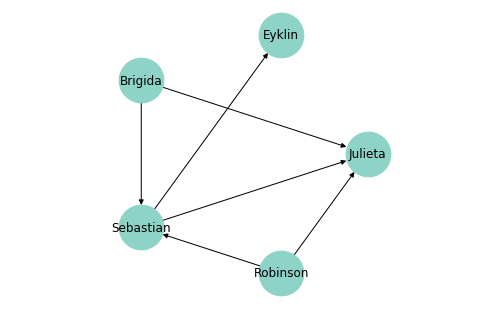

In [8]:
nx.draw_circular(G, 
                 node_color=COLORS[0], 
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')
thinkplot.save('chap02-1')

**Exercise:**  Add another node and a few more edges and draw the graph again.

In [7]:
# Solution goes here
G.add_node('Brigida')
G.add_node('Robinson')
G.add_edge('Robinson', 'Sebastian')
G.add_edge('Brigida', 'Sebastian')
G.add_edge('Robinson', 'Julieta')
G.add_edge('Brigida', 'Julieta')

## Undirected graph

The second example is an undirected graph that represents cities and the driving times between them.

`positions` is a dictionary that maps from each city to its coordinates.

In [9]:
positions = dict(Albany=(-74, 43),
                 Boston=(-71, 42),
                 NYC=(-74, 41),
                 Philly=(-75, 40))

positions['Albany']

(-74, 43)

We can use the keys in `pos` to add nodes to the graph.

In [10]:
G = nx.Graph()
G.add_nodes_from(positions)
G.nodes()

NodeView(('Boston', 'Albany', 'NYC', 'Philly'))

`drive_times` is a dictionary that maps from pairs of cities to the driving times between them.

In [11]:
drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

We can use the keys from `drive_times` to add edges to the graph.

In [18]:
G.add_edges_from(drive_times)
G.edges()

EdgeView([('Boston', 'Albany'), ('Boston', 'NYC'), ('Albany', 'NYC'), ('Maracaibo', 'NYC'), ('NYC', 'Philly')])

Now we can draw the graph using `positions` to indicate the positions of the nodes, and `drive_times` to label the edges.

Writing chap02-2.pdf
Writing chap02-2.png


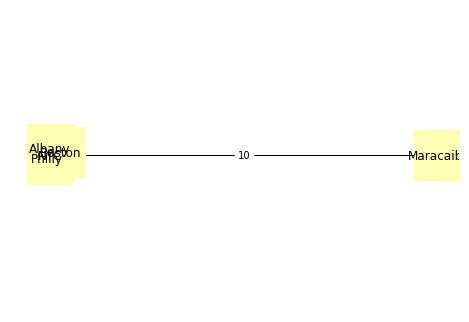

In [19]:
nx.draw(G, positions, 
        node_color=COLORS[1], 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, positions, 
                             edge_labels=drive_times)

plt.axis('equal')
thinkplot.save('chap02-2')

**Exercise:**  Add another city and at least one edge.

In [17]:
# Solution goes here
positions['Maracaibo'] = (41, 41)
drive_times[('NYC', 'Maracaibo')] = 10

## Complete graph

To make a complete graph, we use a generator function that iterates through all pairs of nodes.

In [20]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

`make_complete_graph` makes a `Graph` with the given number of nodes and edges between all pairs of nodes.

In [21]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

Here's a complete graph with 10 nodes:

In [23]:
complete = make_complete_graph(10)
complete.number_of_nodes()

10

And here's what it looks like.

Writing chap02-3.pdf
Writing chap02-3.png


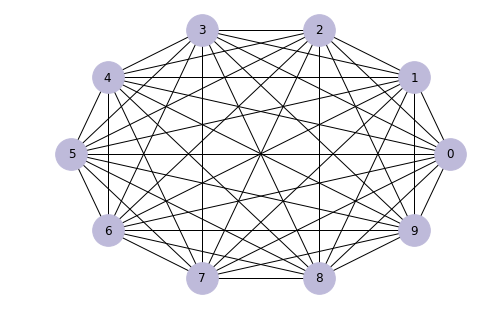

In [24]:
nx.draw_circular(complete, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)
thinkplot.save('chap02-3')

The `neighbors` method the neighbors for a given node.

In [25]:
list(complete.neighbors(0))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

**Exercise:** Make and draw complete directed graph with 5 nodes.

Writing chap02-3_excercise.pdf
Writing chap02-3_excercise.png


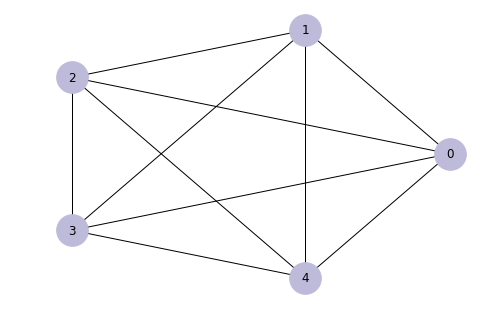

In [26]:
# Solution goes here
complete5 = make_complete_graph(5)
nx.draw_circular(complete5, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)
thinkplot.save('chap02-3_excercise')

## Random graphs

Next we'll make a random graph where the probability of an edge between each pair of nodes is $p$.

The helper function `flip` returns True with probability `p` and False with probability `1-p`

In [27]:
def flip(p):
    return np.random.random() < p

`random_pairs` is a generator function that enumerates all possible pairs of nodes and yields each one with probability `p` 

In [28]:
def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge

`make_random_graph` makes an ER graph where the probability of an edge between each pair of nodes is `p`.

In [29]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

Here's an example with `n=10` and `p=0.3`

In [44]:
RandomSeed(11)

random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())

15

And here's what it looks like:

Writing chap02-4.pdf
Writing chap02-4.png


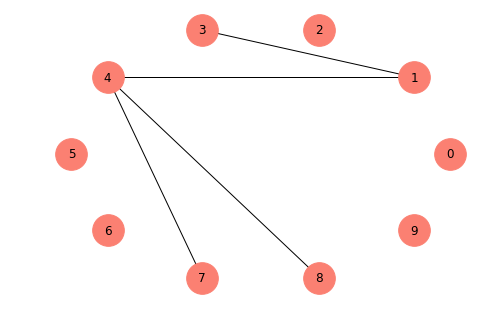

In [53]:
nx.draw_circular(random_graph, 
                 node_color=COLORS[3], 
                 node_size=1000, 
                 with_labels=True)
thinkplot.save('chap02-4')

## Connectivity

To check whether a graph is connected, we'll start by finding all nodes that can be reached, starting with a given node:

In [47]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In the complete graph, starting from node 0, we can reach all nodes:

In [48]:
reachable_nodes(complete, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In the random graph we generated, we can also reach all nodes (but that's not always true):

In [49]:
reachable_nodes(random_graph, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

We can use `reachable_nodes` to check whether a graph is connected:

In [50]:
def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

Again, the complete graph is connected:

In [51]:
is_connected(complete)

True

But if we generate a random graph with a low value of `p`, it's not:

In [52]:
random_graph = make_random_graph(10, 0.1)
len(random_graph.edges())

4

In [54]:
is_connected(random_graph)

False

**Exercise:** What do you think it means for a directed graph to be connected?  Write a function that checks whether a directed graph is connected.

In [31]:
# Solution goes here

## Probability of connectivity

Now let's estimare the probability that a randomly-generated ER graph is connected.

This function takes `n` and `p`, generates `iters` graphs, and returns the fraction of them that are connected.

In [32]:
# version with a for loop

def prob_connected(n, p, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_random_graph(n, p)
        if is_connected(random_graph):
            count += 1
    return count/iters

In [33]:
# version with a list comprehension

def prob_connected(n, p, iters=100):
    tf = [is_connected(make_random_graph(n, p))
          for i in range(iters)]
    return np.mean(tf)

With `n=10` and `p=0.23`, the probability of being connected is about 33%.

In [34]:
RandomSeed(17)

n = 10
prob_connected(n, 0.23, iters=10000)

According to Erdos and Renyi, the critical value of `p` for `n=10` is about 0.23. 

In [35]:
pstar = np.log(n) / n
pstar

So let's plot the probability of connectivity for a range of values for `p`

In [36]:
ps = np.logspace(-1.3, 0, 11)
ps

I'll estimate the probabilities with `iters=1000`

In [37]:
ys = [prob_connected(n, p, 1000) for p in ps]

for p, y in zip(ps, ys):
    print(p, y)

And then plot them, adding a vertical line at the computed critical value

In [38]:
import thinkplot

plt.axvline(pstar, color='gray')
thinkplot.plot(ps, ys)
thinkplot.config(xlabel='Prob of edge (p)',
                 ylabel='Prob connected',
                 xscale='log')

thinkplot.save('chap02-5')

We can run the same analysis for a few more values of `n`.

In [39]:
ns = [30, 100, 300]
ps = np.logspace(-2.5, 0, 11)

thinkplot.preplot(len(ns))
for n in ns:
    pstar = np.log(n) / n
    plt.axvline(pstar, color='gray', alpha=0.3)

    ys = [prob_connected(n, p) for p in ps]
    thinkplot.plot(ps, ys, label='n=%d' % n)

thinkplot.config(xlabel='Prob of edge (p)',
                 ylabel='Prob connected',
                 xscale='log', xlim=[ps[0], ps[-1]],
                 loc='upper left')
thinkplot.save('chap02-6')

As `n` increases, the critical value gets smaller and the transition gets more abrupt.

## Exercises

**Exercise:** In Chapter 2 we analyzed the performance of `reachable_nodes` and classified it in $O(n + m)$, where $n$ is the number of nodes and $m$ is the number of edges.  Continuing the
analysis, what is the order of growth for `is_connected`?

    def is_connected(G):
        start = list(G)[0]
        reachable = reachable_nodes(G, start)
        return len(reachable) == len(G)

In [40]:
# Solution goes here

**Exercise:** In my implementation of `reachable_nodes`, you might be bothered by the apparent inefficiency of adding *all* neighbors to the stack without checking whether they are already in `seen`.  Write a version of this function that checks the neighbors before adding them to the stack.  Does this "optimization" change the order of growth?  Does it make the function faster?

In [41]:
def reachable_nodes_precheck(G, start):
    # FILL THIS IN
    return []

In [42]:
# Solution goes here

In [43]:
%timeit len(reachable_nodes(complete, 0))

In [44]:
%timeit len(reachable_nodes_precheck(complete, 0))

**Exercise:** There are actually two kinds of ER graphs.  The one we generated in the chapter, $G(n, p)$, is characterized by two parameters, the number of nodes and the probability of an edge between nodes.

An alternative definition, denoted $G(n, m)$, is also characterized by two parameters: the number of nodes, $n$, and the number of edges, $m$.  Under this definition, the number of edges is fixed, but their location is random.

Repeat the experiments we did in this chapter using this alternative definition.  Here are a few suggestions for how to proceed:

1. Write a function called `m_pairs` that takes a list of nodes and the number of edges, $m$, and returns a random selection of $m$ edges.  A simple way to do that is to generate a list of all possible edges and use `random.sample`.

2. Write a function called `make_m_graph` that takes $n$ and $m$ and returns a random graph with $n$ nodes and $m$ edges.

3. Make a version of `prob_connected` that uses `make_m_graph` instead of `make_random_graph`.

4. Compute the probability of connectivity for a range of values of $m$.

How do the results of this experiment compare to the results using the first type of ER graph?

In [45]:
# Solution goes here

In [46]:
# Solution goes here

In [47]:
# Solution goes here